<a href="https://colab.research.google.com/github/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/geetanjalisawant16-patch-1/AutoML_and_Clustering_for_Market_segmentation_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AutoML and Clustering Experiments on Pre and Post Pandemic Big Data for 
#Market Segmentation
MSc. DATA SCIENCE

Module: Project Dissertation 

Student ID: K1144343

AutoML-and-Clustering-for-Market-segmentation Coding

####################################################################################################

This Jupyter Notebook consists of the assignment of "Market Segmentation Practical Project" for the MSc. Data Science CI7000 Project Dissertation Module at the Kingston University. The methods and steps of coding are reference from the case studies discussed during the lecture presented by the Module Leader.

####################################################################################################

# Objective and dataset information:


#Approach
In this notebook along with Python libraries such as Numpy, pandas,scitkit learn,matplotlib,seaborn,plotly,clustering algorithms, I will show how EvalML can be the used to carry to out data preprocessing, visualisation with AutoML(Automated Machine learning).EvalML is helps us to play around lots of options for customization to improve prediction outcomes.The steps will be as follows:

1.  load,read in the data and analyse it.
2.  Understand the data by visualisation.
3.  Perform data preprocessing.Removing of outliers from dataset.
4.  Rescaling the attributes like Recency, Monetory and frequency. 
5. Building the model
6. Discover a best performing pipeline based on the objective.
7. Review the best pipeline chosen and analyse its performance.
8. Conclusion








# Importing the dataset

##**Method 1**: From Github (official Pandas github link)


First, we will import the online reatail and market cap datasets directly from the official pandas github [link1](https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/Online%20Retail.xlsx)
[link2](https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/companies_market_cap.csv)

In [60]:
# import all the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd

In [ ]:
import os

In [55]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
!ls


drive  sample_data


In [90]:
retail = pd.read_csv('/content/drive/MyDrive/Online Retail.csv')

In [91]:
post_covid = pd.read_csv('/content/drive/MyDrive/companies_market_cap.csv')

In [92]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [93]:
retail.tail(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [94]:
post_covid

,S.No,Company,Country,Sector,Market cap ($bn),Market cap added,Change
0,1,Amazon,US,Consumer discretionary,"1,317.30",401.1,43.8
1,2,Microsoft,US,Technology,"1,473.00",269.9,22.4
2,3,Apple,US,Technology,"1,523.90",219.1,16.8
3,4,Tesla,US,Consumer discretionary,183.8,108.4,143.8
4,5,Tencent,China,Communication services,550.9,93.1,20.3
...,...,...,...,...,...,...,...
95,96,Snap,US,Communication services,31.5,8.7,38.0
96,97,Changchun High & New Technology Industry,China,Healthcare,21.5,8.5,65.2
97,98,Chewy,US,Consumer discretionary,19.9,8.3,72.2
98,99,GSX Techedu,China,Consumer discretionary,13.4,8.2,160.1


In [95]:
market = pd.merge(retail,post_covid)
market

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


# Initial Data Analysis:

> 1) Quality of data:

*    Frequency counts:
     The given dataset of covid-19 has got Structured and Unstructured data.
     It has got numeric(integer,float),Boolean(0,1) and strings i.e sequence
     of symbols kind of values in the data columns.
*    Discriptive/ Summary statistics.
      (mean,median,standard deviation, max,min,etc.)

*    Normality(frequency histograms)
  
> 2) Quality of Measurements,if applicable

> 3) Data Transformation: data transpose,data type change,sorting,deletion,etc.


## 1) Quality of data:


In [96]:
# a) checking the Datatypes frequency: 
market.info() # Gives the information about Index, Datatype and Memory information.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48624 entries, 0 to 48623
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         48624 non-null  object 
 1   StockCode         48624 non-null  object 
 2   Description       48624 non-null  object 
 3   Quantity          48624 non-null  int64  
 4   InvoiceDate       48624 non-null  object 
 5   UnitPrice         48624 non-null  float64
 6   CustomerID        47829 non-null  float64
 7   Country           48624 non-null  object 
 8   S.No              48624 non-null  int64  
 9   Company           48624 non-null  object 
 10  Sector            48624 non-null  object 
 11  Market cap ($bn)  48624 non-null  object 
 12  Market cap added  48624 non-null  float64
 13  Change            48624 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.6+ MB


In [97]:
for feature in market.columns:
    if market[feature].dtype not in ['int64', 'float64']:
        print(f'{feature}: {market[feature].unique()}')

InvoiceNo: ['536370' '536852' '536974' ... '559557' '560187' '564428']
StockCode: ['22728' '22727' '22726' ... '84877D' '84926A' '84877B']
Description: ['ALARM CLOCK BAKELIKE PINK' 'ALARM CLOCK BAKELIKE RED '
 'ALARM CLOCK BAKELIKE GREEN' ... 'WAKE UP COCKEREL TILE COASTER'
 'GREEN ROUND COMPACT MIRROR' 'TUMBLER BAROQUE']
InvoiceDate: ['01/12/2010 08:45' '03/12/2010 09:51' '03/12/2010 13:59' ...
 '11/07/2011 10:33' '15/07/2011 12:05' '25/08/2011 11:27']
Country: ['France' 'Australia' 'Netherlands' 'Germany' 'Switzerland' 'Japan'
 'Denmark' 'Sweden' 'Hong Kong' 'Singapore' 'Canada']
Company: ['Hermès International' "L'Oréal" 'Atlassian' 'ASML' 'Prosus' 'Adyen'
 'Just Eat Takeaway' 'Unilever' 'Audi' 'Roche' 'Nestlé' 'Lonza'
 'Chugai Pharmaceutical' 'Keyence' 'Daiichi Sankyo' 'Novo Nordisk'
 'Spotify' 'Alibaba Health Information Technology' 'Sea Group' 'Shopify'
 'Barrick Gold' 'Lululemon Athletica']
Sector: ['Consumer discretionary' 'Consumer staples' 'Technology' 'Healthcare'
 'Communic

In [98]:
market.count() # returns the value of non-null values in each Dataframe(market)

InvoiceNo           48624
StockCode           48624
Description         48624
Quantity            48624
InvoiceDate         48624
UnitPrice           48624
CustomerID          47829
Country             48624
S.No                48624
Company             48624
Sector              48624
Market cap ($bn)    48624
Market cap added    48624
Change              48624
dtype: int64

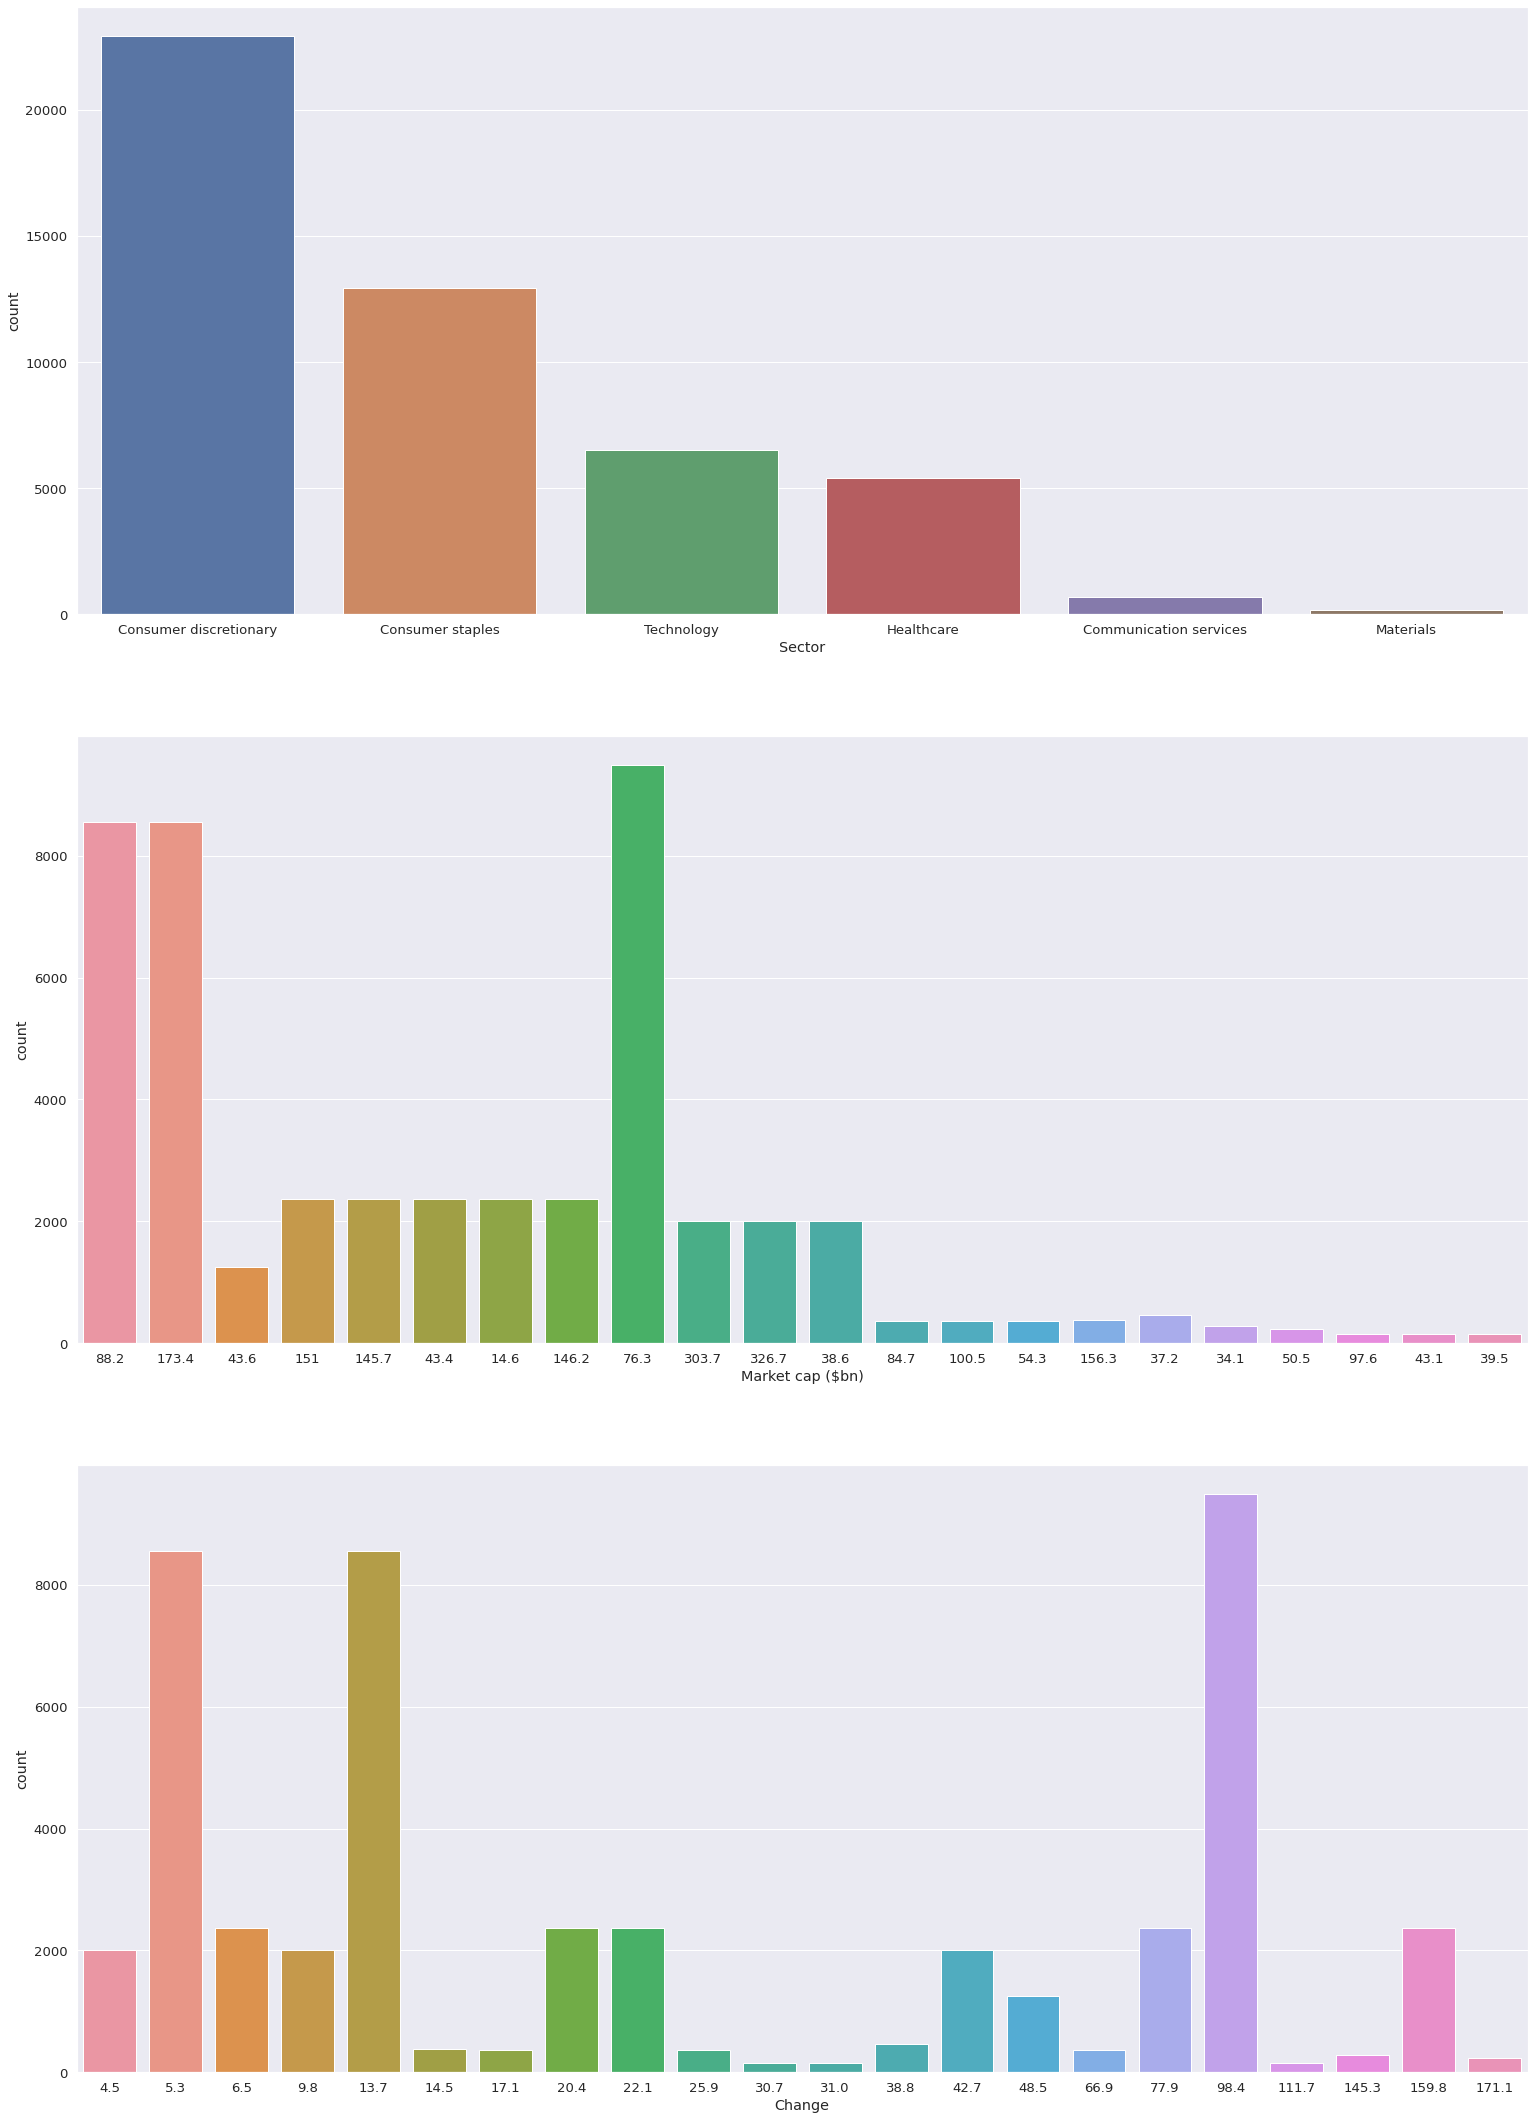

In [67]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(26, 38))
sns.set(font_scale=1.2)
cols_ = ["Sector", "Market cap ($bn)", "Change"]

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=market, ax=ax[ind])

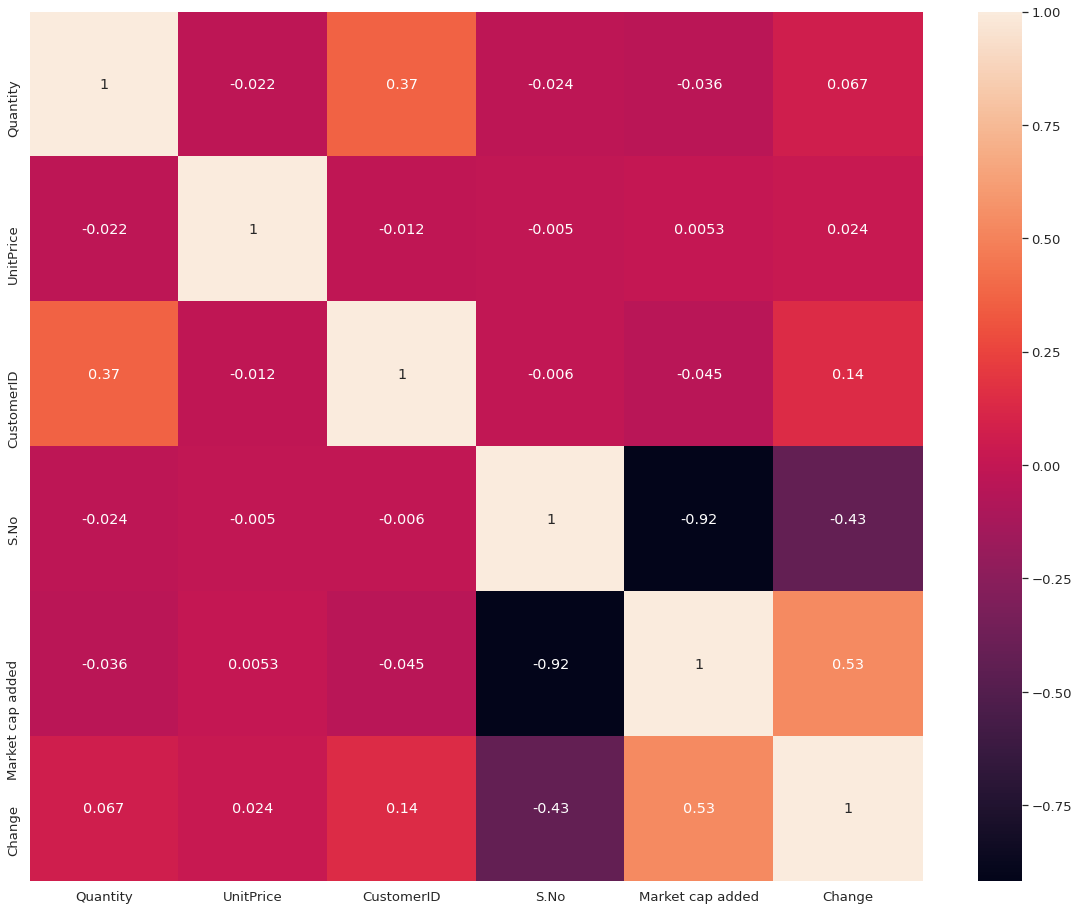

In [68]:
fig, ax = plt.subplots(figsize=(20, 16))
df_corr = market.corr(method="pearson")
mask = np.zeros_like(np.array(df_corr))
ax = sns.heatmap(df_corr,mask=mask, annot=True)

In [69]:
# b) Descriptive/ Summary Statistics(mean,meadian,standard deviation,max,min,etc)
market.describe() # gives Summary staistics for numerical columns

,Quantity,UnitPrice,CustomerID,S.No,Market cap added,Change
count,48624.000000,48624.000000,47829.000000,48624.000000,48624.000000,48624.000000
mean,33.963619,4.653855,13161.048297,56.485830,18.868104,43.640058
std,73.552953,64.830839,995.588752,30.563052,11.334199,45.999461
min,-624.000000,0.000000,12357.000000,14.000000,8.800000,4.500000
25%,6.000000,1.050000,12532.000000,25.000000,9.000000,6.500000
50%,12.000000,1.650000,12681.000000,62.000000,11.600000,20.400000
75%,25.000000,3.350000,13813.000000,92.000000,27.300000,98.400000
max,2400.000000,4161.060000,17844.000000,95.000000,51.500000,171.100000


Text(0.5, 1.0, 'Frequency Histogram')

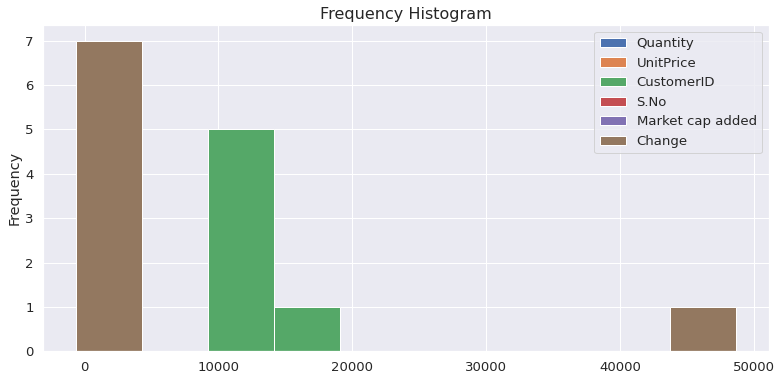

In [70]:
# c) Normality(frequency histograms)
market.describe().plot.hist(bins=10,figsize=[13,6])
plt.title('Frequency Histogram',fontsize=16)

In [ ]:
market.equals(market)

True

In [ ]:
market.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            48614, 48615, 48616, 48617, 48618, 48619, 48620, 48621, 48622,
            48623],
           dtype='int64', length=48624)

In [ ]:
market.shape

(48624, 14)

In [71]:
market.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48620,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48621,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48622,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Data Cleaning


In [72]:
# find duplicates
market[market.duplicated()] 
# the o/p shows there are duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
3568,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,21/03/2011 12:42,1.65,12637.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3569,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,21/03/2011 12:42,1.65,12637.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
3614,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,21/03/2011 12:42,2.95,12637.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3615,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,21/03/2011 12:42,2.95,12637.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
5100,552826,82583,HOT BATHS METAL SIGN,4,11/05/2011 13:20,2.10,14277.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47484,564539,22378,WALL TIDY RETROSPOT,5,25/08/2011 15:22,2.10,12715.0,Sweden,77,Spotify,Communication services,37.2,10.4,38.8
47707,541975,22452,MEASURING TAPE BABUSHKA PINK,24,24/01/2011 14:24,2.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3
47708,541975,22454,MEASURING TAPE BABUSHKA RED,24,24/01/2011 14:24,2.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3
47709,541975,20749,ASSORTED COLOUR MINI CASES,6,24/01/2011 14:24,7.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3


In [73]:
market.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


In [74]:
# count the number of null values of all columns
market.isnull().sum()
# o/p
# customerID values can be removed


InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID          795
Country               0
S.No                  0
Company               0
Sector                0
Market cap ($bn)      0
Market cap added      0
Change                0
dtype: int64

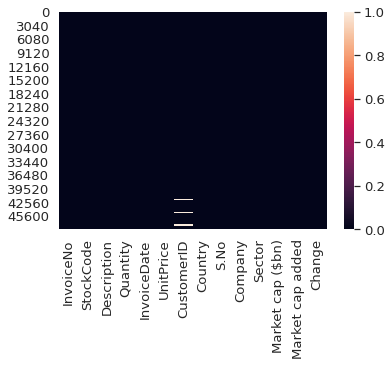

In [75]:
import seaborn as sns
sns .heatmap(market.isnull()) # we can show missing values graphically presented

In [76]:
# Droping rows having missing values

market = market.dropna()
market.shape

(47829, 14)

In [ ]:
# count the number of null values of all columns
market.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
S.No                0
Company             0
Sector              0
Market cap ($bn)    0
Market cap added    0
Change              0
dtype: int64

In [100]:
market

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


#Data Visualisation:

code reference: https://www.kaggle.com/roshansharma/online-retail-transactions-in-uk


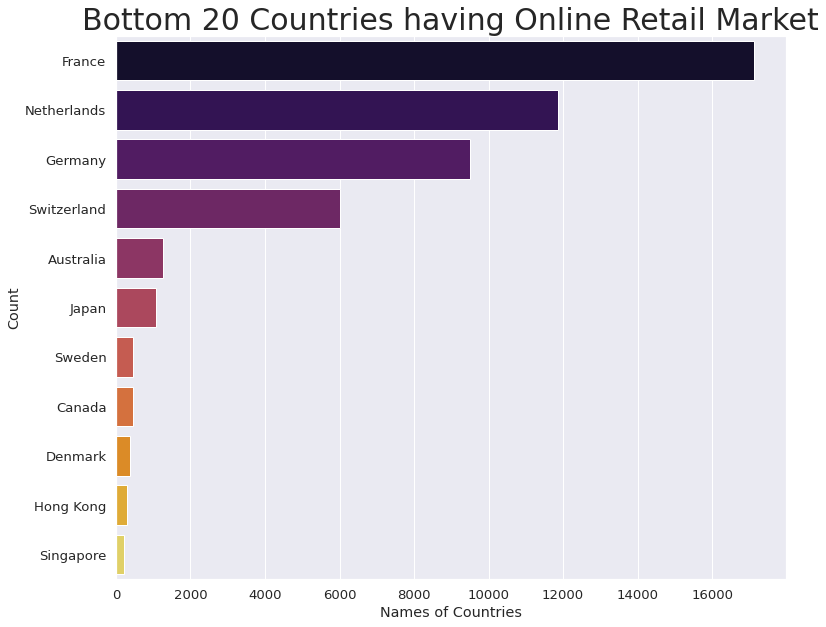

In [101]:
# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = market['Country'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 30)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

Country
France         220960
Germany        117448
Switzerland     90975
Australia       83653
Japan           75654
Sweden          35637
Canada           8289
Denmark          8188
Singapore        5234
Hong Kong        4769
Name: Quantity, dtype: int64


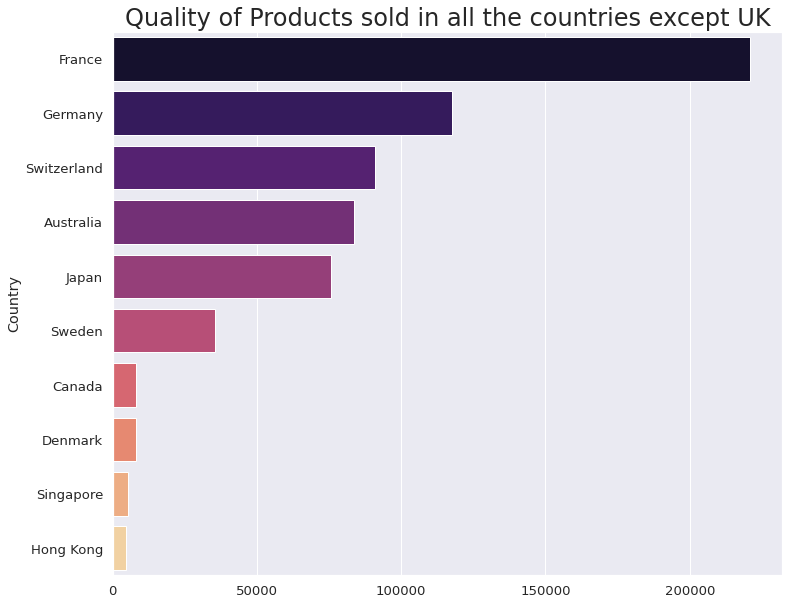

In [103]:
# checking how many quantity of products have been sold online from each country

M = market['Quantity'].groupby(market['Country']).agg('sum').sort_values(ascending = False)[1:]
print(M)

sns.barplot(x = M.values, y = M.index, palette = 'magma')
plt.title('Quality of Products sold in all the countries except UK',fontsize=24)
plt.show()

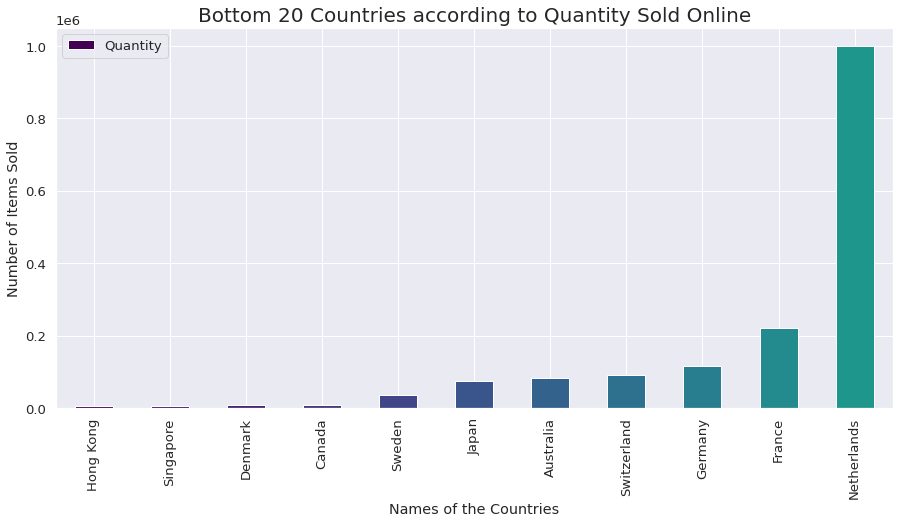

In [104]:
# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

color = plt.cm.viridis(np.linspace(0, 1, 20))
market['Quantity'].groupby(market['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7),
                                                                                                    color = color)

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


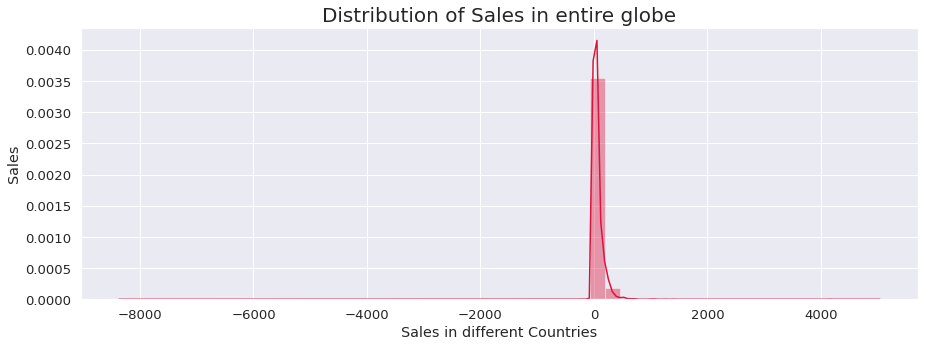

In [105]:
# FEATURE ENGINEERING 
# ADDING A COLUMN TO THE DATASET

# sales = unitprice*quantity

market['Sales'] = market['UnitPrice'] * market['Quantity']



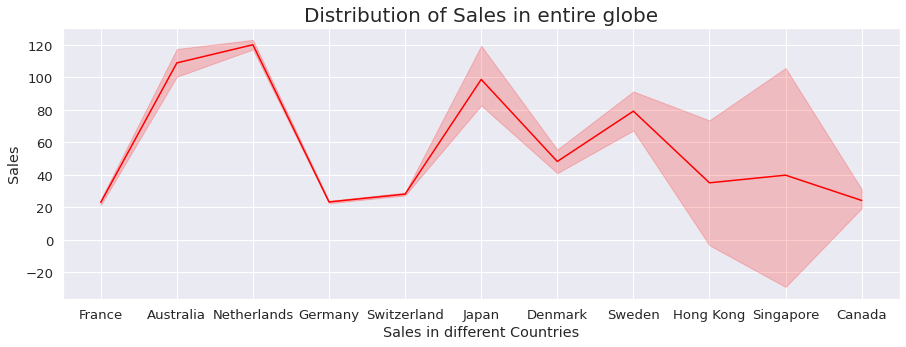

In [119]:
# visualizing the sales in the entire globe
plt.rcParams['figure.figsize'] = (15, 5)
sns.lineplot(x=market['Country'],y=market['Sales'], color = 'red',data=market)
plt.title('Distribution of Sales in entire globe', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

Country
France         394807.80
Germany        221698.21
Switzerland    169156.05
Australia      137077.27
Japan          106021.86
Sweden          36595.91
Denmark         18768.14
Canada          10999.14
Hong Kong       10117.04
Singapore        9120.39
Name: Sales, dtype: float64


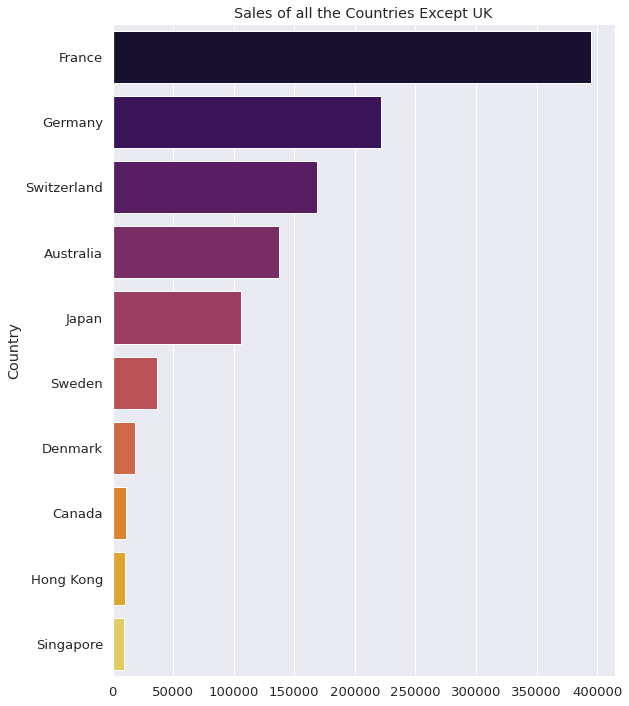

In [120]:
# looking at each country's sales

plt.rcParams['figure.figsize'] = (9, 12)
a = market['Sales'].groupby(market['Country']).agg('sum').sort_values(ascending = False)[1:]
print(a)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Sales of all the Countries Except UK')
plt.show()

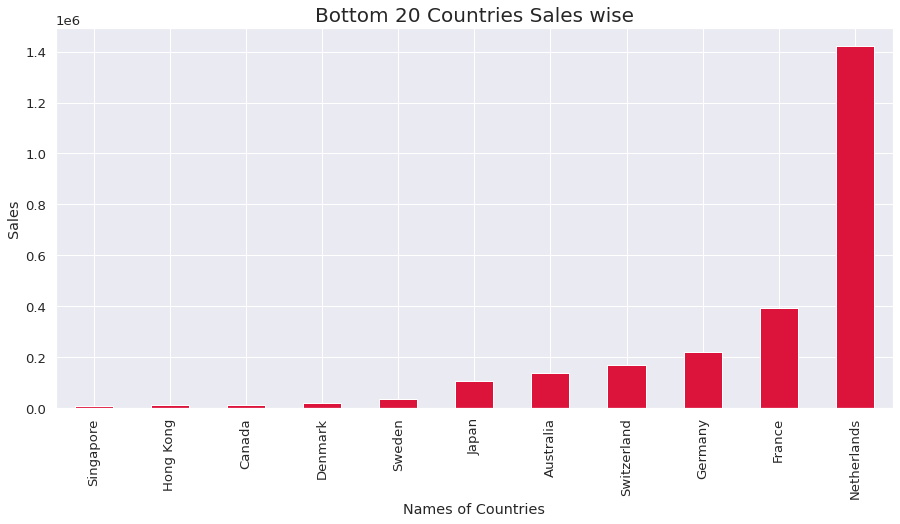

In [122]:
# looking at the bottom 20 countries sales wise

market['Sales'].groupby(market['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'crimson')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

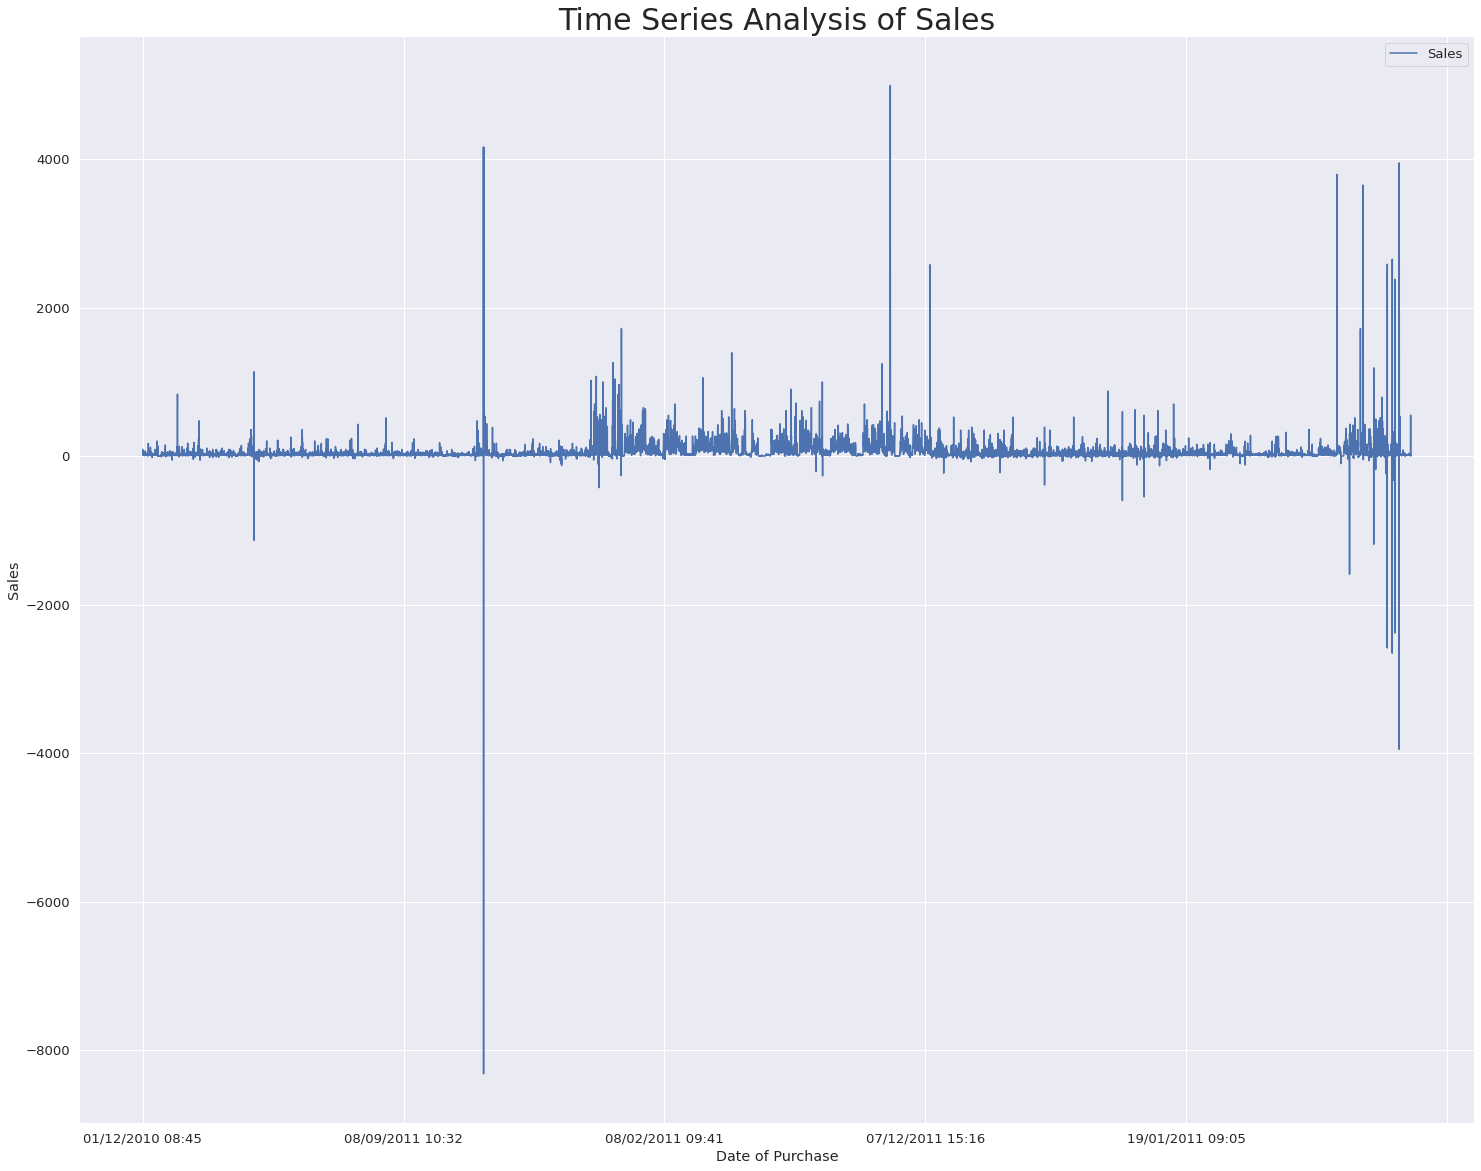

In [127]:
# Sales vs Invoicedate (Time series Analysis)

plt.rcParams['figure.figsize'] = (25, 20)
market.plot(x = 'InvoiceDate', y = 'Sales')
plt.title("Time Series Analysis of Sales", fontsize = 30)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales')
plt.show()

#Data Preparation

## Analysis of the Customers based on below 3 factors:
* R (Recency): Number of days since last purchase
* F (Frequency): Number of transactions
* M (Monetary): Total amount of transactions (revenue contributed)








In [128]:
# New Attribute : Monetary

market['Amount'] = market['Quantity']*market['UnitPrice']
rfm_m = market.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12357.0,18623.01
1,12367.0,168.90
2,12371.0,5663.88
3,12372.0,1298.04
4,12377.0,4884.36


In [129]:
# New Attribute : Frequency
market['Class'] = market['Sector']+market['Company']
rfm_f = market.groupby('CustomerID')['Class'].sum()


In [130]:
rfm_f = market.groupby('CustomerID')[['InvoiceNo','Class']].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency','Class']
rfm_f.head()

,CustomerID,Frequency,Class
0,12357.0,393,393
1,12367.0,11,11
2,12371.0,189,189
3,12372.0,52,52
4,12377.0,231,231


In [131]:
# Merging the two dfs rfm_m, rfm_f

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency,Class
0,12357.0,18623.01,393,393
1,12367.0,168.90,11,11
2,12371.0,5663.88,189,189
3,12372.0,1298.04,52,52
4,12377.0,4884.36,231,231


In [132]:
# New Attribute : Recency

# Convert to datetime to proper datatype

market['InvoiceDate'] = pd.to_datetime(market['InvoiceDate'],format='%d/%m/%Y %H:%M')

In [133]:
# Compute the maximum date to know the last transaction date

max_date = max(market['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [135]:
# Compute the difference between max date and transaction date

market['Recency'] = max_date - market['InvoiceDate']
market.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change,Sales,Amount,Class,Recency
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.0,90.0,Consumer discretionaryHermès International,373 days 04:05:00
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.0,90.0,Consumer staplesL'Oréal,373 days 04:05:00
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,90.0,90.0,Consumer discretionaryHermès International,373 days 04:05:00
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3,90.0,90.0,Consumer staplesL'Oréal,373 days 04:05:00
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7,45.0,45.0,Consumer discretionaryHermès International,373 days 04:05:00


In [136]:
market.to_csv('new_market.csv')

In [137]:
# Compute last transaction date to get the recency of customers

rfm_p = market.groupby('CustomerID')['Recency'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Recency
0,12357.0,32 days 20:43:00
1,12367.0,3 days 20:02:00
2,12371.0,44 days 02:34:00
3,12372.0,71 days 00:38:00
4,12377.0,314 days 21:05:00


In [138]:
# Extract number of days only

rfm_p['Recency'] = rfm_p['Recency'].dt.days
rfm_p.head()

,CustomerID,Recency
0,12357.0,32
1,12367.0,3
2,12371.0,44
3,12372.0,71
4,12377.0,314


In [139]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID',how='inner')
#rfm.columns = ['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Class,Recency
0,12357.0,18623.01,393,393,32
1,12367.0,168.90,11,11,3
2,12371.0,5663.88,189,189,44
3,12372.0,1298.04,52,52,71
4,12377.0,4884.36,231,231,314


##The removal of outliers from the dataset by two methods:


1. Statistical
2. Domain Specific



Text(0.5, 0, 'Attributes')

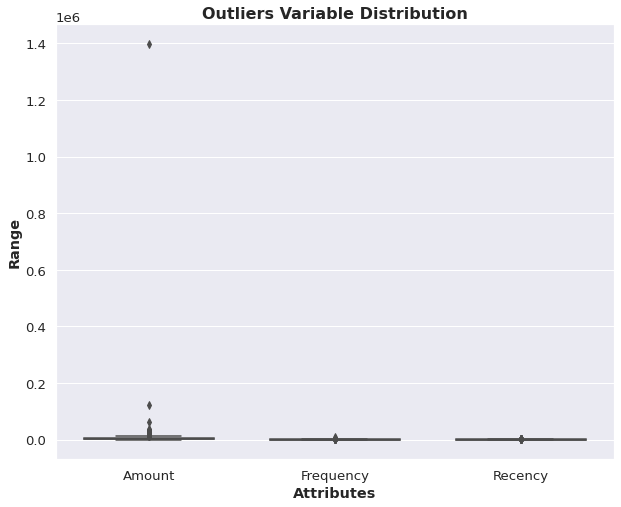

In [140]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v" ,whis=1.8,saturation=1.9, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [141]:
# Removing (statistical) outliers for Amount  # reference :https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [142]:
rfm

,CustomerID,Amount,Frequency,Class,Recency
0,12357.0,18623.01,393,393,32
1,12367.0,168.90,11,11,3
2,12371.0,5663.88,189,189,44
3,12372.0,1298.04,52,52,71
4,12377.0,4884.36,231,231,314
...,...,...,...,...,...
245,16321.0,230.70,16,16,71
246,17404.0,30300.82,201,201,3
247,17443.0,1602.72,3,3,219
248,17444.0,8820.12,405,405,147


##Rescaling the attributes
It is very important to rescale the variables to have comparable scale.There rae two ways of rescaling such as:


1.   Min-max scalng
2.  standardisation (mean=0, sigma=1)



In [143]:
from sklearn.preprocessing import StandardScaler, normalize
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(246, 3)

In [144]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,2.581460,1.428642,-0.548664
1,-0.612947,-0.735532,-0.835395
2,0.338234,0.272905,-0.430016
3,-0.417493,-0.503251,-0.163060
4,0.203300,0.510851,2.239550


#Building the model


In [145]:
# Importing machinelearning library
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [146]:
kmeans = KMeans(n_clusters=4, max_iter=50)
print(kmeans.fit(rfm_df_scaled))
print(kmeans.labels_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[2 3 1 3 0 2 3 0 3 3 3 1 3 3 2 0 3 3 3 3 0 0 3 3 1 3 3 1 0 2 3 1 1 3 3 3 2
 1 3 1 3 1 1 3 3 1 3 3 0 1 3 3 0 3 3 3 3 0 3 0 3 0 3 3 1 3 3 3 3 3 1 3 3 3
 3 3 3 3 3 3 1 1 0 3 0 1 0 3 2 1 3 3 0 0 1 3 0 3 2 0 3 0 3 3 1 3 3 0 3 3 3
 0 3 3 3 0 1 3 3 3 3 1 0 0 3 0 1 1 3 3 3 2 3 0 3 3 3 3 3 3 3 3 3 3 0 0 3 1
 3 3 3 3 1 0 3 3 1 0 3 3 3 2 3 3 2 2 1 1 0 3 0 3 3 3 3 3 1 3 3 3 1 0 3 1 3
 3 3 1 3 3 3 3 1 1 3 3 3 1 1 3 3 2 0 0 0 0 0 3 1 0 0 3 1 3 0 1 1 3 3 0 0 1
 0 3 3 0 0 2 1 3 0 3 3 3 3 3 3 3 1 3 0 3 2 0 1 3]


In [148]:
# Elbow-curve/SSD

ssd = [] # ssd = stoping sight distance, it is a curve thoery
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans ( n_clusters=num_clusters, max_iter=50 )
    kmeans.fit ( rfm_df_scaled )

    ssd.append ( kmeans.inertia_ )

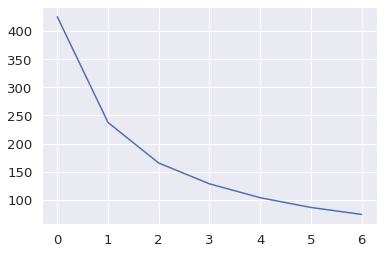

In [150]:
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

In [151]:
# Silhouette analysis
from sklearn import metrics
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5419727051514495
For n_clusters=3, the silhouette score is 0.5515166711749621
For n_clusters=4, the silhouette score is 0.5238510407649032
For n_clusters=5, the silhouette score is 0.5385586340923186
For n_clusters=6, the silhouette score is 0.47379679768749433
For n_clusters=7, the silhouette score is 0.46475058504521566
For n_clusters=8, the silhouette score is 0.3677415443909471


In [152]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
 kmeans.labels_

array([2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       2, 1, 2, 0], dtype=int32)

In [154]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Class,Recency,Cluster_Id
0,12357.0,18623.01,393,393,32,2
1,12367.0,168.90,11,11,3,0
2,12371.0,5663.88,189,189,44,0
3,12372.0,1298.04,52,52,71,0
4,12377.0,4884.36,231,231,314,1


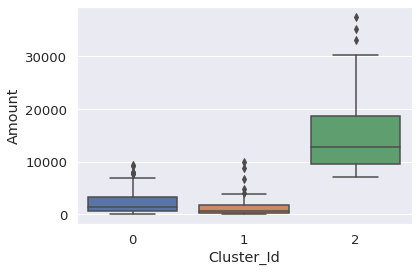

In [155]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

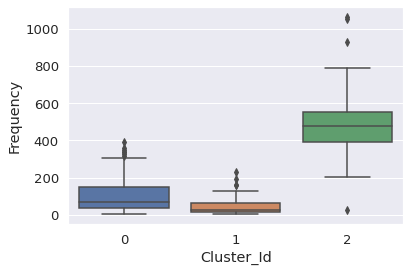

In [156]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

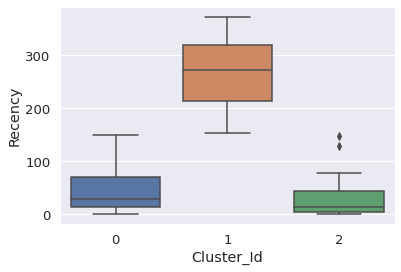

In [157]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

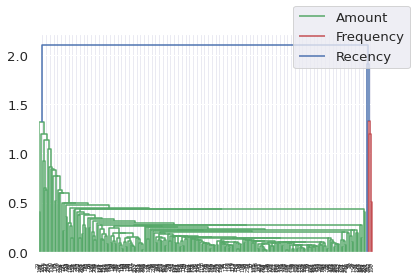

<Figure size 2160x2160 with 0 Axes>

In [158]:
# Single linkage: 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.figlegend(rfm_df_scaled,loc='upper right')
plt.figure(figsize=[30,30])
plt.show()

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

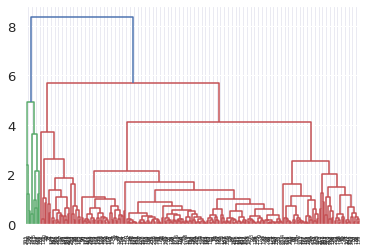

<Figure size 2160x2160 with 0 Axes>

In [159]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=[30,30])
plt.show()

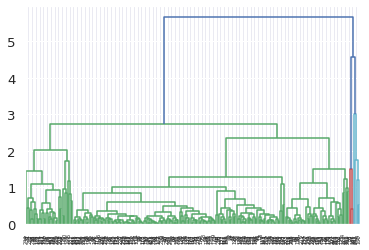

In [160]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [161]:
# 3 clusters
from scipy.cluster.hierarchy import cut_tree
cluster_labels = kmeans.labels_
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [162]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Class,Recency,Cluster_Id,Cluster_Labels
0,12357.0,18623.01,393,393,32,2,0
1,12367.0,168.90,11,11,3,0,0
2,12371.0,5663.88,189,189,44,0,0
3,12372.0,1298.04,52,52,71,0,0
4,12377.0,4884.36,231,231,314,1,0


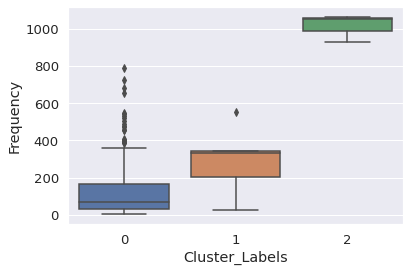

In [163]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

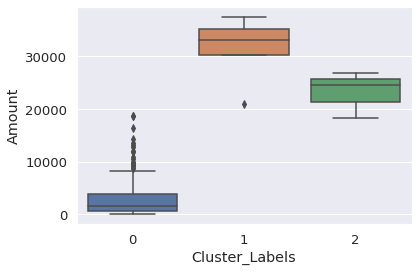

In [164]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

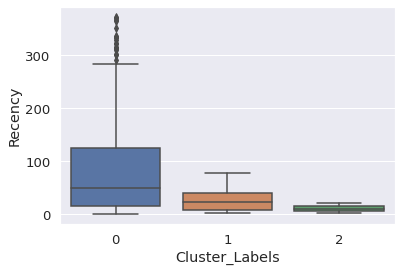

In [165]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

#Conclusion: First part
##K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster Id 1 are frequent buyers.
Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.
##Hierarchical Clustering with 3 Cluster Labels

Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster_Labels 2 are frequent buyers.
Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

In [166]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=3)
brc.fit(rfm)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [167]:
brc.predict(rfm)

array([0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 2, 1])

In [ ]:
brc.labels_

array([0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 2, 1])

In [168]:
rfm['Cluster_brc'] = brc.labels_

In [169]:
rfm.head()

,CustomerID,Amount,Frequency,Class,Recency,Cluster_Id,Cluster_Labels,Cluster_brc
0,12357.0,18623.01,393,393,32,2,0,0
1,12367.0,168.90,11,11,3,0,0,1
2,12371.0,5663.88,189,189,44,0,0,2
3,12372.0,1298.04,52,52,71,0,0,1
4,12377.0,4884.36,231,231,314,1,0,1


In [170]:
from sklearn import cluster
birch = cluster.Birch(n_clusters='Cluster_brc')

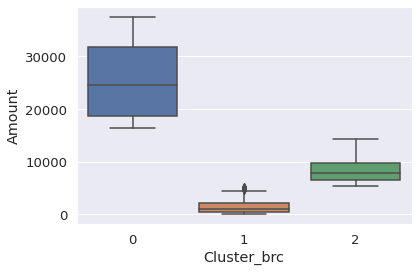

In [171]:
# Box plot to visualize Cluster_brc vs Frequency

sns.boxplot(x='Cluster_brc', y='Amount', data=rfm)

The below code is refrence from https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

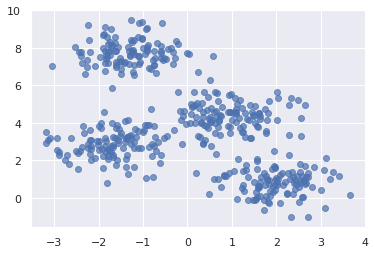

In [173]:
rfm, clusters = make_blobs(n_samples=450, centers=4, cluster_std=0.70, random_state=0)
plt.scatter(rfm[:,0], rfm[:,1], alpha=0.7, edgecolors='b')

In [174]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc.fit(rfm)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=1.5)

In [175]:
labels = brc.predict(rfm)

In [176]:
labels

array([0, 0, 1, 0, 2, 3, 1, 2, 0, 0, 0, 3, 3, 2, 3, 1, 1, 0, 3, 1, 1, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 2, 0, 0, 0, 1, 3, 2, 2, 1, 0, 2, 2, 0, 0,
       3, 3, 1, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 1, 3, 2, 1, 2, 2, 3, 3, 3,
       2, 3, 0, 0, 0, 0, 2, 1, 1, 1, 2, 3, 1, 2, 3, 3, 2, 1, 2, 0, 2, 2,
       1, 3, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 3, 3, 2, 1, 1, 2, 2,
       1, 0, 1, 2, 1, 2, 2, 3, 0, 1, 0, 3, 0, 1, 1, 3, 1, 0, 2, 0, 3, 1,
       0, 2, 3, 3, 0, 3, 3, 2, 1, 1, 3, 0, 0, 3, 1, 1, 0, 1, 2, 3, 1, 2,
       0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 1, 1, 3, 1, 3, 2, 2, 3,
       1, 1, 2, 2, 0, 0, 0, 3, 2, 1, 3, 0, 1, 3, 0, 0, 1, 2, 3, 0, 1, 2,
       2, 3, 0, 1, 1, 0, 1, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2, 3, 0, 2, 0, 2,
       0, 2, 3, 3, 2, 3, 1, 1, 3, 1, 2, 0, 0, 3, 3, 1, 2, 1, 2, 3, 2, 1,
       0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 0, 0, 3, 1, 2, 3, 1,
       1, 0, 0, 3, 0, 2, 1, 2, 3, 0, 1, 3, 1, 2, 0, 1, 3, 1, 0, 2, 1, 1,
       0, 0, 2, 0, 3, 2, 2, 1, 3, 2, 1, 3, 0, 2, 0,

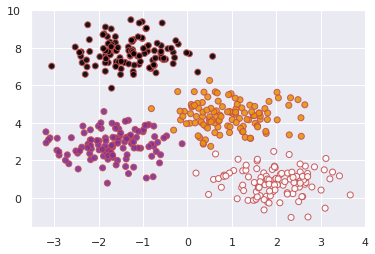

In [177]:
plt.scatter(rfm[:,0], rfm[:,1], c=labels, cmap='CMRmap', alpha=0.9, edgecolors='r')


#Conclusion: Part 2

##Conclusion for BIRCH clustering: 
BIRCH provides a clustering method for very large datasets. It makes a large clustering problem plausible by concentrating on densely occupied regions, and creating a compact summary. BIRCH can work with any given amount of memory, and the I/O complexity is a little more than one scan of data. Other clustering algorithms can be applied to the subclusters produced by BIRCH.

In [178]:
from sklearn.metrics import accuracy_score


In [179]:
from sklearn import metrics

from sklearn.metrics import adjusted_rand_score, homogeneity_score, v_measure_score, completeness_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [180]:
labels_true = labels

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    labels_true = kmeans.labels_
    
    # silhouette score
    adjusted_rand_score = adjusted_rand_score(labels_true,rfm_df_scaled)
    print("For n_clusters={0}, adjusted_rand_score is {1}".format(num_clusters, adjusted_rand_score))

In [182]:
print("Adjusted Random Score: ", adjusted_rand_score(labels_true,cluster_labels))
print("Homogeneity Score: ", homogeneity_score(labels_true, cluster_labels))
print("V-Measure Score: ", v_measure_score(labels_true, cluster_labels))
print ("Completeness: ", completeness_score(labels_true, cluster_labels))
print ("Adjusted Mutual Information: ", adjusted_mutual_info_score(labels_true, cluster_labels))

Adjusted Random Score:  0.2312504371264398
Homogeneity Score:  0.13185877181490488
V-Measure Score:  0.1937930465761808
Completeness:  0.36544150025427585
Adjusted Mutual Information:  0.18140880160908154
